# Fundamentals of Matplotlib

In [1]:
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

In [2]:
import matplotlib.pyplot as plt
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

Nothing will actually print. `plot` just generates a graph with no points

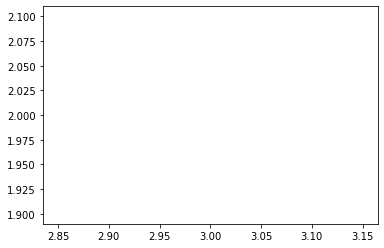

In [3]:
plt.plot(3,2)

Use the argument `'.'` to plot a dot at x=3, y=2

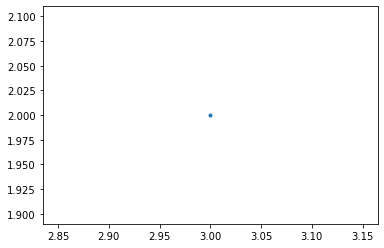

In [4]:
plt.plot(3,2, '.')

In [5]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure() # top-level object we'll be using, create new empty figure

canvas = FigureCanvasAgg(fig) # associate figure with canvas backend 

ax = fig.add_subplot(111) # 111 means we want to add one plot; return object = Axes object which has methods for plotting

ax.plot(3, 2, '.')

# backend can't render plot within Jupyter, so have to save image to png file
canvas.print_png('test.png')

Use HTML to see rendered image:

In [6]:
%%html # tell Jupyter to render this block as HTML code
<img src='test.png' />

UsageError: unrecognized arguments: # tell Jupyter to render this block as HTML code


Make a new plot:

In [ ]:
plt.figure()

# plot the point (3,2) again using a circle marker
plt.plot(3,2,'o')

# get access to current axes of current figure
ax = plt.gca()

# set ranges of axes: min_x, max_x, min_y, max_y
ax.axis([0,6,0,10]) 


Can add Artists to an Axes object any time. Pyplot does this for us when we call `figure()`. It determines what shape we want from the string, the location associated w that shape, and creating Patch object to add to axes.

In [ ]:
plt.figure()

# add 3 points
plt.plot(1.5,1.5,'o')
plt.plot(2,2,'o')
plt.plot(2.5,2.5,'o')

Get the child objects of `Axes` object:

In [ ]:
ax = plt.gca() # new axis and figure being created because we're in a new cell

plt.plot(1.5,1.5,'o')

ax.get_children()

Things to Remember:
* `plot()` generates a series of points which get rendered against an axis object.
* Pyplot retrieves the current figure with `plt.gcf()` and the current axis with `plt.gca()`.
* Calling `plot()` against the pyplot module actually calls the axis plot functions underneath.
* Pyplot is the scripting interface

# Scatterplots
2D plot that takes in x and y values

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x,y) # produce scatterplot

`scatter` doesn't represent items as a series like `plot` did. We can pass in a list of colors corresponding to given points. Let's have all the points be green except the last one is red:

In [ ]:
x = np.array([1,2,3,4,5,6,7,8])
y = x

# create list of colors
colors = ['green']*(len(x)-1)
colors.append('red')

# create new figure
plt.figure()

# plot the points with marker size 100 and our colors list
plt.scatter(x,y,s=100, c=colors)

Separation of data into lists is common. Why list comprehension and lambdas are so important.

But you can also store data pairs as tuples:

`zip(x,y)`: creates pairwise tuples from x and y; `[(x1,y1), (x2,y2), ...]`; need to use `list()` to see results of iterating over a `zip` called 'realizing' since `zip` returns a generator OR `*` to unpack a collection inton positionanl arguments

In [ ]:
# convert two lists into a list of pairwise tuples
## Method 1
zip_generator = zip([1,2,3,4,5], [6,7,7,8,9,10])

print(list(zip_generator))

## Method 2
zip_generator = zip([1,2,3,4,5], [6,7,7,8,9,10])

print(*zip_generator)

If you want to turn data back into two lists (one with x-component and one with y), we can use `*` with `zip`. When you pass the list or an iterable to a function and prepend with an `*`, each item is actually taken out of the iterable and passed as a separate argument.

## Example using Data Slices
Color code each series, change transparency level, add descriptive labels

In [ ]:
plt.figure()

plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students') # first two elements of x and y
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students') # last three elements of x and y

Label didn't show because currently held internally for each series.

Properties of Axis:
* have labels to explain what they are and their units
* add chart titles

`plot` is calling GCA which calls the set `xlabel` and `ylabel`

In [ ]:
plt.figure()

plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students') # first two elements of x and y
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students') # last three elements of x and y

# add axis labels
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')

Add legend, which uses the labels in the data underneath

In [ ]:
plt.figure()

plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students') # first two elements of x and y
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students') # last three elements of x and y

# add axis labels
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')

# add legend
plt.legend()

Can add a little razzle dazzle to the legend as well by passing in parameters:

In [ ]:
f=plt.figure()

plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students') # first two elements of x and y
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students') # last three elements of x and y

# add axis labels
plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')

# add legend to lower right-hand corner, gets rid of frame, and adds title
plt.legend(loc=4, frameon=False, title='Legend');

All these objects are renderable objects associated with the axes. 

The legend is an Artist which means it contains children. Create a function to recursively go through the list of children in an Artist:

In [ ]:
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    # check if object is an Artist and if so, print out its string name
    if isinstance(art, Artist):
        # do pretty printing by indenting by object's depth
        print(" " * depth + str(art))
    
        for child in art.get_children():
            rec_gc(child, depth+2)
            
            
# call this function on legend artist to see what the legend is made up of
rec_gc(f.legend())

# Line Plots
Connects data points with a line, so technically the first plot we made was a line plot, but it just had one point. Will automatically color-code when receiving more than one series of data.

`plot()` will plot your values on the y-axis and the indices of your values on the x-axis.

Use *mini formatting language* to describe rendering of markers and lines. "-o" means to use a solid line with circle markers.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# use numpy to create a linear series of data points one through eight
linear_data = np.arange(8) + 1
exponential_data = linear_data ** 2

# make plot
plt.figure()
plt.plot(linear_data, '-o', exponential_data, '-o')

Can add an arbitrary line (e.g. trendline) using "--r" which says to plot a dashed line in red:

In [ ]:
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r')

Didn't need to call `plt.figure()` because by default pyplot scripting interface will call `plot.gcf` (an existing figure in the kernel) when you try and do something. If there's no figure, then pyplot will create one for us. Therefore, with the way this Jupyter notebook is setup by default, it will close a figure after each cell is executed and so pyplot will create a figure for us --> never have to use `plt.figure()` again :)

Now add labels and legend. It doesn't matter what order you do things because it all gets rendered at the end.

In [ ]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A Title')

# add legend with entries (b/c we didn't have labels when we plotted the data series)
plt.legend(['Baseline','Competition','Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r')

## Fill Between
* Commonly used with line plots, but can be done with other plots, to highlight differences between series.
* `fill_between()` needs to be called on current axes object `plt.gca()`

In [ ]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A Title')
plt.legend(['Baseline','Competition','Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')

# *remember, by default, plot will use indicies of series as the x-axis*

plt.gca().fill_between(range(len(linear_data)), # range you want to apply the coloring 
                       linear_data, exponential_data, # lower and upper bounds for coloring
                       facecolor = 'blue',
                       alpha=0.25) # transparency value, for fun

## Working with Dates
Dates on the x-axis:

In [ ]:
# a way to use Numpy's arange() to generate dates at the daily interval between given start and end dates
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')

plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o')

Change x-axis so dates aren't overlapping --> play with the ticks Artist object and its text

In [ ]:
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')
plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o')

# set a variable that points to x axis
x = plt.gca().xaxis

# iterate through each tick on x axis and rotate its label
for item in x.get_ticklabels():
    item.set_rotation(45)

Add back in headings:

In [ ]:
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')
plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o')

# set a variable that points to x axis
x = plt.gca().xaxis

# iterate through each tick on x axis and rotate its label
for item in x.get_ticklabels():
    item.set_rotation(45)
    
    
# change labels
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear Performance')

## LaTeX with matplotlib
* Do not need LaTeX installed
* Escape LaTeX math mode with dollar signs

## Changing Figure Size
* specify size when you make the figure initially with `figsize` parameter

In [ ]:
# create new figure that's 8"x6" at 300 DPI
plt.figure(figsize=(8,6))

# bring in previous plotting details
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')
plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o')

# rotate tick labels for x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
    
# change labels
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential ($x^2$) vs. Linear ($x$) Performance')

# Bar Charts
Pass in X component and parameter for the height of the bars (Y)

<BarContainer object of 8 artists>

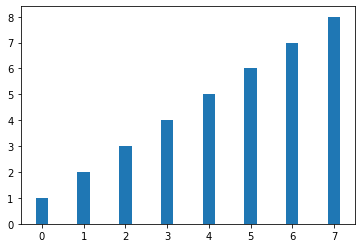

In [1]:
import matplotlib.pyplot as plt
import numpy as np

linear_data = np.arange(8) + 1

# generate list of X labels
xvals = range(len(linear_data))

plt.bar(xvals, linear_data, width = 0.3)

Add second bar by calling `plt.bar` again.

<BarContainer object of 8 artists>

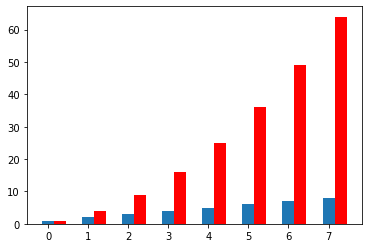

In [2]:
new_xvals = []
exponential_data = linear_data**2

# adjust x axis values to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)
    
# plot both
plt.bar(xvals, linear_data, width=0.3)
plt.bar(new_xvals, exponential_data, width=0.3, color='red')

x labels are not centered with bars
pain to add data manually
not easy when you add more bars because you have to calculate where to left-position labels

## Error Bars

In [ ]:
from random import randint
linear_err = [randint(1,4) for x in range(len(linear_data))]
linear_err

plt.bar(xvals, linear_data, width=0.3, yerr=linear_err)

## Stacked Bars
Don't have to deal with PGD/positional arguments

Stack by plotting the first series of bars and then the second by setting the `bottom` parameter to equal the height of the previous series's height so `plot.bar` knows where to stack the second series. X values are the same between series.

In [ ]:
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width=0.3, bottom=linear_data, color='r')

## Horizontal Bar Charts with `plt.barh()`
Pivotting a regular bar chart: change `bottom` to `left` and `width` to `height`

In [ ]:
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height=0.3, color='b')
plt.barh(xvals, exponential_data, height=0.3, left=linear_data, color='r')

# Dejunkifying Plots
Example: plot the popularity of five programming languages in 2016 according to Stack Overflow

In [15]:
import matplotlib.pyplot as plt
import numpy as np

languages = ['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages)) # x position arrangement
popularity = [56, 39, 34, 34, 29]

Text(0.5, 1.0, 'Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow')

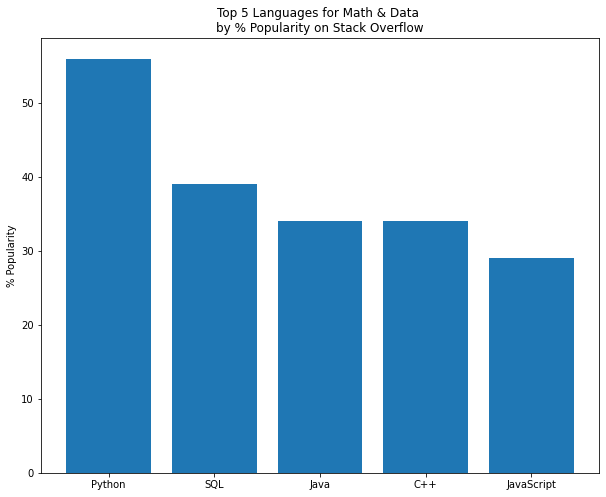

In [16]:
# create bar chart based on rank and popularity
plt.figure(figsize=(10,8))
plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow')

## 1. Eliminate frame
Get the current axis and iterate through all the splines and set their visibilities to `False`. You could also make them transparent.

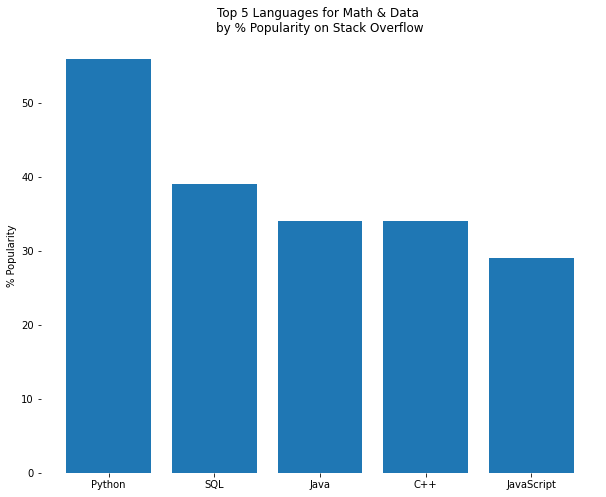

In [17]:
# create bar chart based on rank and popularity
plt.figure(figsize=(10,8))
plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow')

# remove chart frame
for spine in plt.gca().spines.values(): # gca is plural for axes so gets x and y axes
    spine.set_visible(False)
    

## 2. Change color
Highlight Python

([<matplotlib.axis.XTick at 0x7f9373102b80>,
 [Text(0, 0, 'Python'),
  Text(1, 0, 'SQL'),
  Text(2, 0, 'Java'),
  Text(3, 0, 'C++'),
  Text(4, 0, 'JavaScript')])

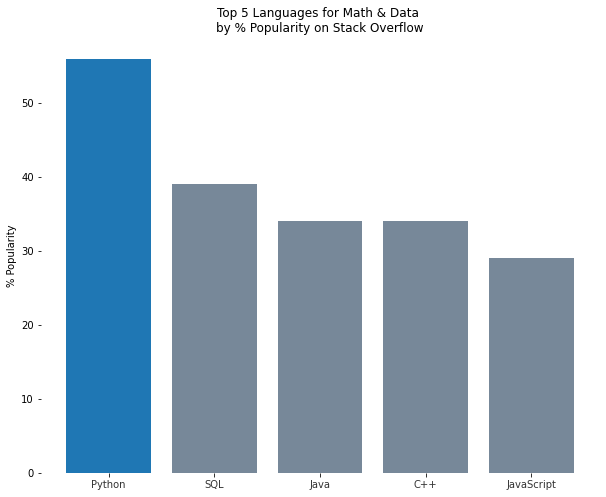

In [18]:
# create bar chart based on rank and popularity
plt.figure(figsize=(10,8))
plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow')

# remove chart frame
for spine in plt.gca().spines.values(): # gca is plural for axes so gets x and y axes
    spine.set_visible(False)
    
# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')

# change python bar to a contrasting color
bars[0].set_color('#1F77B4')

# soften labels by turning to grey
plt.xticks(pos, languages, alpha=0.8)

## 3. Remove y axis and directly label individual bars
the y axis doesn't give us any additional info

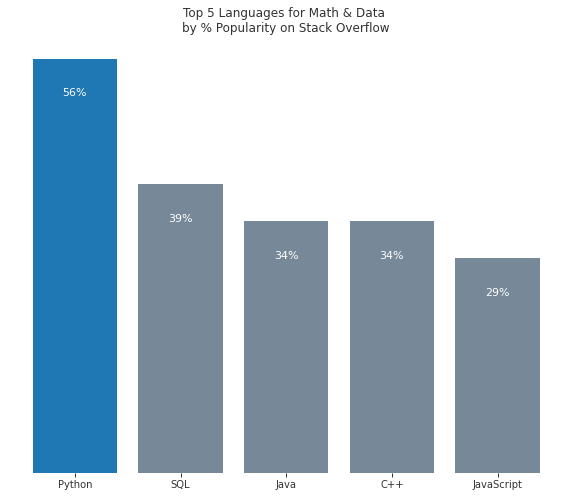

In [19]:
# create bar chart based on rank and popularity
plt.figure(figsize=(10,8))
#plt.bar(pos, popularity, align='center')
#plt.xticks(pos, languages) # done below
#plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % Popularity on Stack Overflow', alpha=0.8)

# remove chart frame
for spine in plt.gca().spines.values(): # gca is plural for axes so gets x and y axes
    spine.set_visible(False)
    
# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')

# change python bar to a contrasting color
bars[0].set_color('#1F77B4')

# soften labels by turning to grey
plt.xticks(pos, languages, alpha=0.8)

# remove y label
plt.yticks([])

# add data labels
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height - 5, str(int(height)) + '%',
                   ha='center', color='w', fontsize=11)